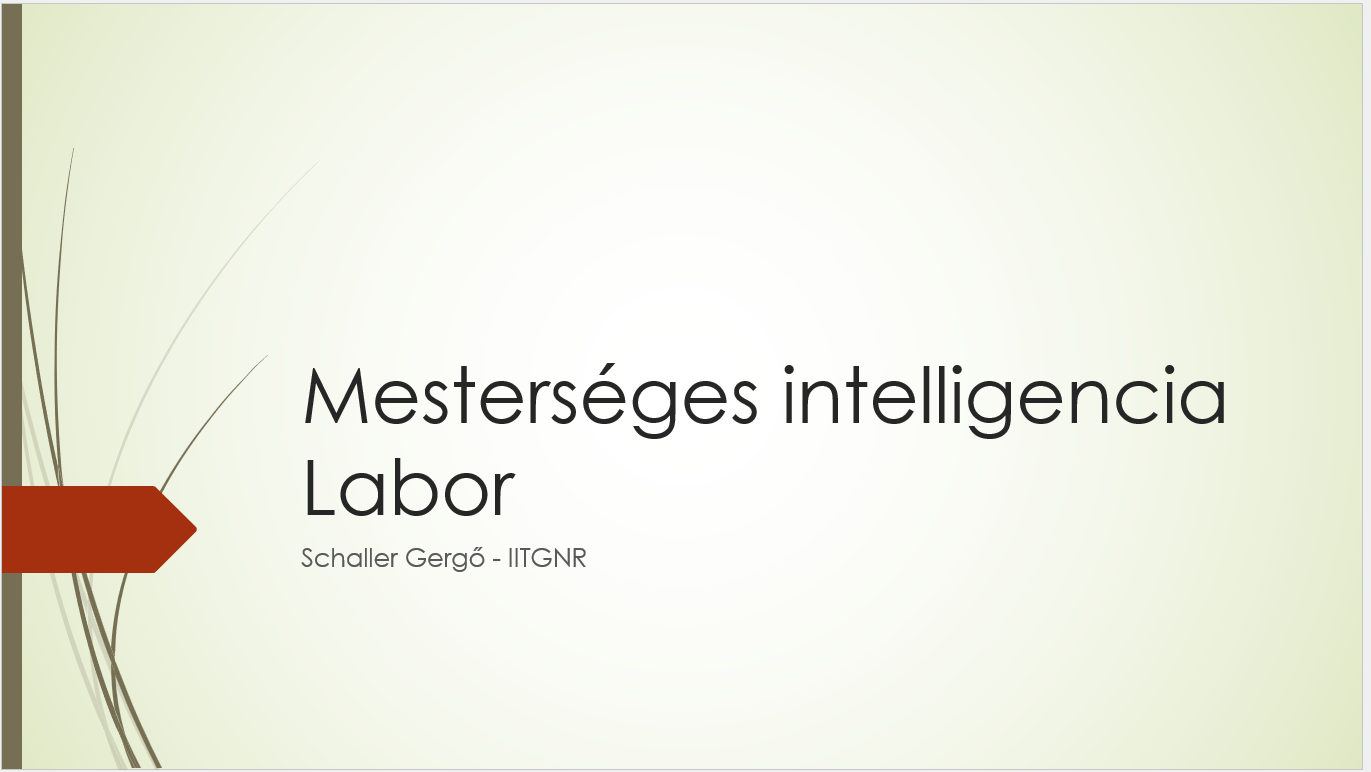

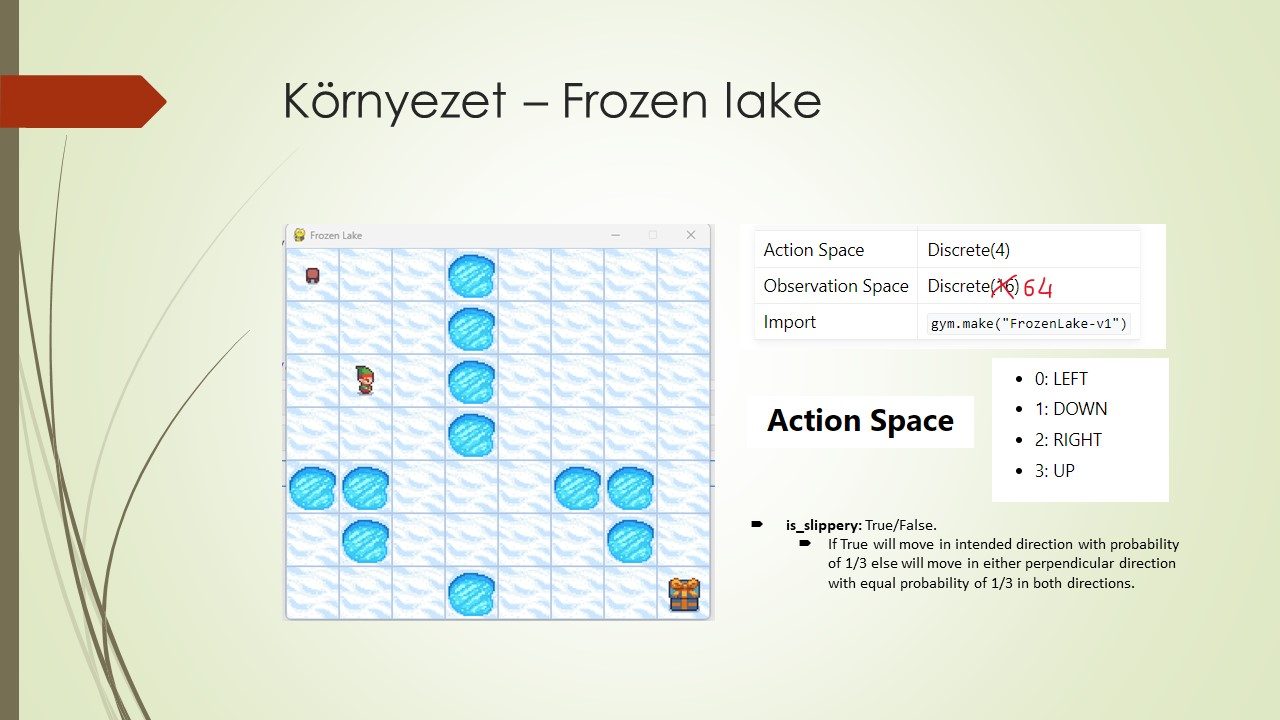

In [1]:
slippery=True
custom_map= [
    "SFFHFFFF",
    "FFFHFFFF",
    "FFFHFFFF",
    "FFFHFFFF",
    "HHFFFHHF",
    "FHFFFFHF",
    "FFFHFFFG",
]

In [2]:
import numpy as np
import gymnasium as gym

def q_learning(env, num_episodes=100000, learning_rate=0.2, discount_factor=0.9, exploration_prob=0.99):
    # Q-learning algoritmus implementációja

    state_space_size = env.observation_space.n  # Az állapottér mérete
    action_space_size = env.action_space.n  # A művelettér mérete
    q_table = np.zeros((state_space_size, action_space_size))  # Q-tábla inicializálása

    for episode in range(num_episodes):
        env.reset()  # Környezet újrainicializálása
        state = 0  # Kezdeti állapot
        total_reward = 0  # Összegzett jutalom a jelenlegi epizódban
        done = False  # A jelenlegi epizód befejeződött-e

        while not done:
            if np.random.rand() < exploration_prob:
                action = env.action_space.sample()  # Felfedezés
            else:
                action = np.argmax(q_table[state, :])  # Kihasználás
            next_state, reward, done, _, _ = env.step(action)  # Lépés végrehajtása
            if done and reward == 0:
                reward = -1  # Negatív jutalom, ha a célállapotba értünk és nem kaptunk pozitív jutalmat
            q_value = q_table[state, action]
            max_next_q_value = np.max(q_table[next_state, :])
            new_q_value = (1 - learning_rate) * q_value + learning_rate * (reward + discount_factor * max_next_q_value)
            q_table[state, action] = new_q_value
            total_reward += reward
            state = next_state

        if total_reward > 0:
            exploration_prob = exploration_prob * 0.95  # Csökkentett felfedezési valószínűség pozitív jutalom esetén

        if exploration_prob < 0.00001:
            break  # Kilépés, ha a felfedezési valószínűség eléri a minimális értéket

        if episode % 10000 == 0:
            print(episode)  # Kiírás minden 10000. epizódnál

    print(episode)  # Végleges epizódszám kiírása
    return q_table  # Visszaadás: a tanult Q-tábla


env = gym.make('FrozenLake-v1', desc=custom_map,is_slippery=slippery)
q_table = q_learning(env)


0
10000
16031


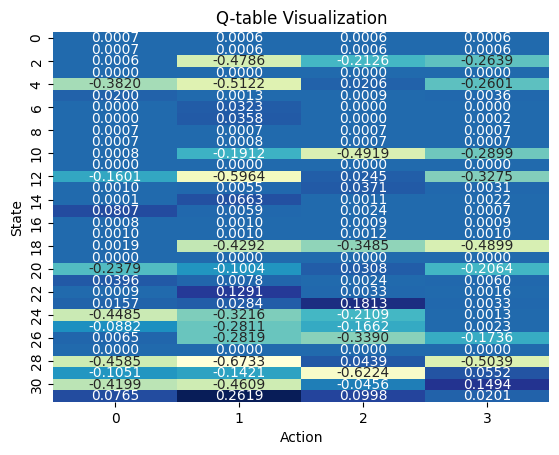

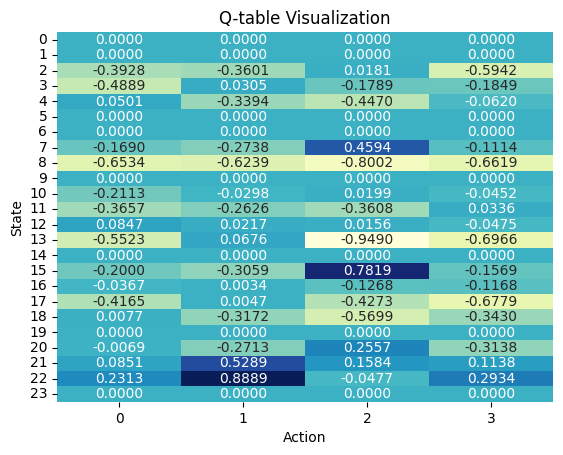

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_q_table(q_table,low,high):
    sns.heatmap(q_table[low:high], annot=True, cmap="YlGnBu", cbar=False, fmt=".4f")
    plt.xlabel("Action")
    plt.ylabel("State")
    plt.title("Q-table Visualization")
    plt.show()

visualize_q_table(q_table,0,32)
visualize_q_table(q_table,32,64)

In [ ]:
import time
render=True
ep_count=100
def render_moves(env, table):
    global render
    state = 0
    done = False
    reward=0
    count=0
    while not done:
        action = np.argmax(table[state])  
        next_state, reward, done, _,_ = env.step(action)
        if render: env.render()
        state = next_state
        count+=1
    return (reward,count)
   
    
if render : env = gym.make('FrozenLake-v1', desc=custom_map,is_slippery=slippery,render_mode="human")
total_count=total_reward = 0             
for i in range(0,ep_count):
    env.reset()
    reward , count = render_moves(env, q_table)
    total_count+=count
    total_reward+=reward
env.close()
print("Avarage move:",total_count/ep_count,"Success:",str(total_reward/ep_count*100)+"%")

**A negatív reward hatására megtanulja, hogy egy jeges cella mellett az ellenkező irányba kell lépnie.**
